<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9043-CDNA-20203/blob/main/projeto_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

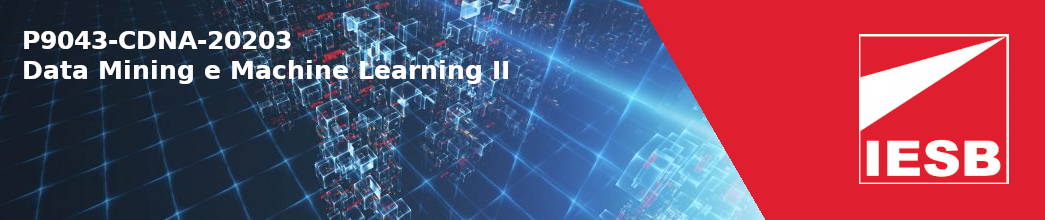

In [ ]:
from IPython.display import Image
Image('/content/sample_data/banner_iesb_pos_colab_dmmlii.png')

## Projeto final

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline


from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

### Importação e visualização dos dados

In [2]:
# Carrega dataset de treino e exibe 5 primeiras linhas

train = pd.read_csv("/content/sample_data/train.csv")
train.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
# Tipo de dados
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
# Shape
train.shape

(9557, 143)

In [7]:
# Localiza colunas (features) com valores ausentes
train.isnull().sum(axis=0).sort_values(ascending = False).head(5)

rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
dtype: int64

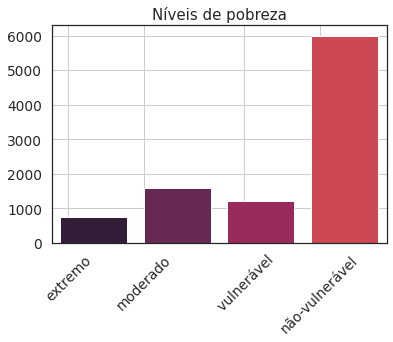

In [9]:
def class_distribution(train):
    # Diferentes tipos de níveis de pobreza
    sns.set(style="white",font_scale=1.25)
    sns.set_palette("rocket")

    ax = sns.countplot(data= train, x = 'Target')

    #setting the labels on x-axis
    plt.xticks([-0.3,0.6,1.8,2.7],['extremo', 'moderado', ' vulnerável', 'não-vulnerável'], rotation = 45)
    plt.xlabel("")
    plt.ylabel("")
    plt.grid('True')
    
    #set the title 
    plt.title('Níveis de pobreza');
    
class_distribution(train)

### Limpeza de dados

In [10]:
# Corrigindo as instâncias classificadas incorretamente, todos os membros de uma determinada família devem ter o mesmo nível de pobreza

# Encontrando domicílios em que todos os membros da família têm os mesmos níveis de pobreza
household_unique = train.groupby('idhogar')['Target'].nunique() == 1

# Encontrando domicílios em que todos os membros da família não têm os mesmos níveis de pobreza
household_not_unique = household_unique[household_unique != True ]

# Corrigindo a classificação
for family in household_not_unique.index:
    # Seleção d aatual classificação
    actual_label = int(train[(train['idhogar'] == family) & (train['parentesco1'] == 1)]['Target'])
    # Correção da classificação
    train.loc[train['idhogar'] == family, 'Target'] = actual_label

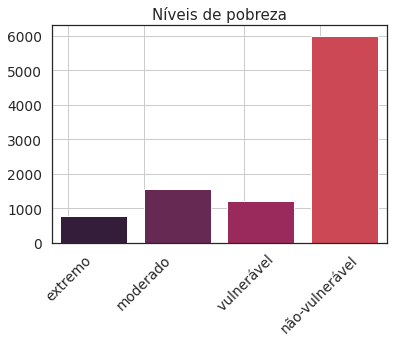

In [11]:
# Verificando a distribuição da classe depois de correção da classificação
class_distribution(train)

### Imputação de valores

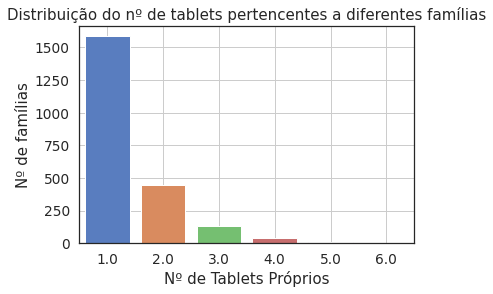

In [18]:
# v18q1: indica o número de tablets que a família possui e depende da v18q, que indica se uma família possui um tablet
# Plotando gráfico para o número de tablets
sns.set(style="white", font_scale=1.25)
sns.set_palette("muted")
ax = sns.countplot(data = train, x = 'v18q1')
plt.title("Distribuição do nº de tablets pertencentes a diferentes famílias")
plt.xlabel("Nº de Tablets Próprios")
plt.ylabel("Nº de famílias");
plt.grid("True")

In [19]:
# Relação de v18q1 e v18q
train.loc [(train.v18q1.isnull ()), ['v18q1', 'v18q']]. head (15)

,v18q1,v18q
0,NaN,0
2,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0
10,NaN,0
11,NaN,0
12,NaN,0
15,NaN,0
16,NaN,0


Todas as famílias que não possuem tablet algum têm o valor v18q1 como NaN

In [20]:
# Substituição de v18q1 = 'NaN' por zeros.
train['v18q1'] = train['v18q1'].fillna(0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

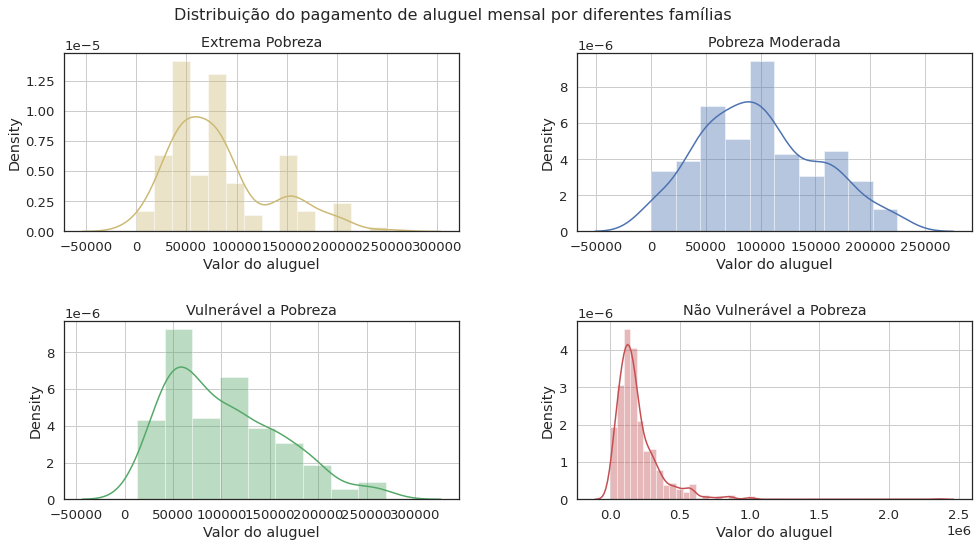

In [25]:
# Imputação de valores ausentes para v2a1


# v2a1  : Pagamento de aluguel mensal de diferentes famílias

def distribution_rent(train):
    sns.set(style="white", font_scale=1.2)
    sns.set_palette("dark")

    plt.figure(1, figsize = (18,8))
    plt.suptitle('Distribuição do pagamento de aluguel mensal por diferentes famílias', fontsize=16)

    plt.subplot(2, 2, 1)
    ax = sns.distplot(train.loc[(train.Target == 1), 'v2a1'].dropna(), color = 'y')
    plt.title("Extrema Pobreza")
    plt.xlabel("Valor do aluguel")
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    ax = sns.distplot(train.loc[(train.Target == 2), 'v2a1'].dropna(), color = 'b')
    plt.title("Pobreza Moderada")
    plt.xlabel("Valor do aluguel")
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    ax = sns.distplot(train.loc[(train.Target == 3), 'v2a1'].dropna(), color = 'g')
    plt.title("Vulnerável a Pobreza")
    plt.xlabel("Valor do aluguel")
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    ax = sns.distplot(train.loc[(train.Target == 4), 'v2a1'].dropna(), color = 'r')
    plt.title("Não Vulnerável a Pobreza");
    plt.xlabel("Valor do aluguel")
    plt.grid(True)
    
    plt.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.5, top=0.9);
 
distribution_rent(train)

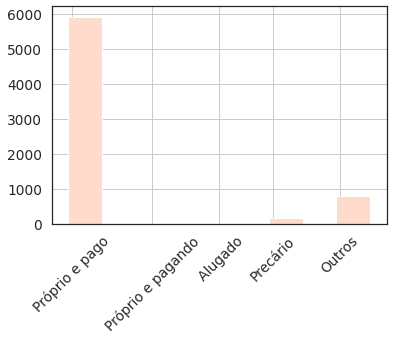

In [30]:
# Distribuição de pagamento de aluguel em atraso com tipos de métodos de pagamento de aluguel tipovi *
rent_mode = [rent for rent in train if rent.startswith('tipov') ]

# Encontrando famílias com aluguel atrasado
sns.set(style="white", font_scale=1.25)
sns.set_palette("Reds")
train.loc[(train.v2a1.isnull()), rent_mode].sum().plot(kind = 'bar');
plt.xticks([-0.2, 1, 2, 2.8, 3.8],['Próprio e pago', 'Próprio e pagando', ' Alugado', 'Precário', 'Outros'], rotation = 45);
plt.grid(True)

A maioria das famílias com valores ausentes no pagamento do aluguel têm suas casas totalmente quitadas. No caso de famílias que pagam aluguel, as prestações estão pagas integralmente.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

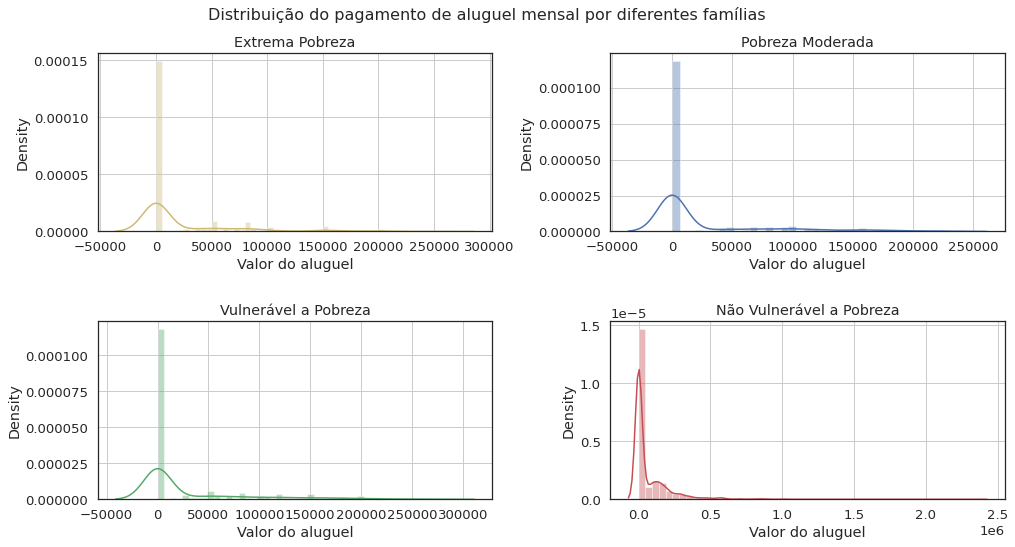

In [31]:
train.loc[(train.tipovivi1 == 1), 'v2a1'] = 0

distribution_rent(train)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



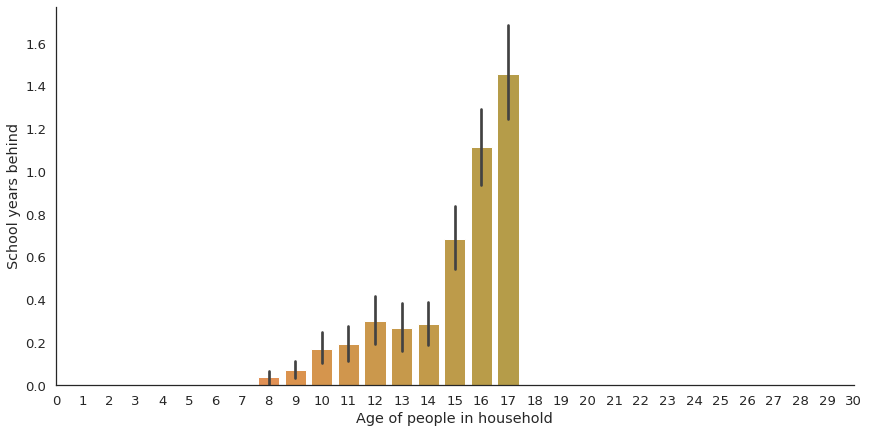

In [32]:
# Imputação de valores ausentes para rez_esc
# rez_esc: indica o número de anos letivos atrasados e possui correlação com a idade
# valores ausentes podem indicar que famílias não possuem filhos ou possuem filhos mais velhos que já deixaram a vida escolar

fg = sns.factorplot(x='age', y='rez_esc',size=6,  aspect=2, kind='bar',data=train)
plt.xlim(0, 30);
plt.xlabel("Age of people in household")
plt.ylabel("School years behind");

Crianças entre as idades de 8 - 17 frequentam a escola. As demais são computadas como zero ou nan. Desta forma podemos imputar zeros a todos os demais casos

In [33]:
# Distribuição de idade e rez_esc sem valores nulos
train.loc[(train.rez_esc.notnull()), 'age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [34]:
# Distribuição de idade e rez_esc com valores nulos
train.loc[(train.rez_esc.isnull()), 'age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [35]:
# Substituindo nulo por zeros para todas as pessoas com idade > 19 e < 7
train.loc[((train.age >  17) | (train.age < 7)) & (train.rez_esc.isnull()), 'rez_esc'] = 0

In [36]:
# Um outlier identificado
train.loc[train.rez_esc.isnull(), 'age']   

2514    10
Name: age, dtype: int64

In [37]:
#SQBmeaned: quadrado da média de anos de educação de adultos (> = 18) da família
#meaneduc: média d eanos de educação formal para adultos (18+)

train.loc [(train.SQBmeaned.isnull ()) | (train.meaneduc.isnull ()), ['idhogar', 'SQBmeaned', 'meaneduc']]

# Substituição de meaneduc pela média de todos os anos de educação de adultos (> = 18) na família. SQB significa meaneduc²

,idhogar,SQBmeaned,meaneduc
1291,1b31fd159,NaN,NaN
1840,a874b7ce7,NaN,NaN
1841,a874b7ce7,NaN,NaN
2049,faaebf71a,NaN,NaN
2050,faaebf71a,NaN,NaN


In [38]:
# Suubstituição pela média
train.meaneduc = train.meaneduc.fillna(train.meaneduc.mean())

# Substituição pelo valor²
missing_SQBmeaned =  train.loc[(train.SQBmeaned.isnull()), ['idhogar','SQBmeaned', 'meaneduc']]
missing_SQBmeaned

,idhogar,SQBmeaned,meaneduc
1291,1b31fd159,NaN,9.231523
1840,a874b7ce7,NaN,9.231523
1841,a874b7ce7,NaN,9.231523
2049,faaebf71a,NaN,9.231523
2050,faaebf71a,NaN,9.231523


In [39]:
squared_meaneduc =  float(missing_SQBmeaned['meaneduc'].iloc[0]) ** 2

# Preenchimento com valor²
train.SQBmeaned = train.SQBmeaned.fillna(squared_meaneduc)

### Alterando os tipos de dados das colunas

In [40]:
train.select_dtypes(include=['object']).head(5)    # Selecionando os tipos de dados do objeto e ignorando o ID da coluna

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [41]:
# Alterando o tipo de dado de dependência para flutuante, substituindo sim por 1 e não por zero

train.loc[(train.dependency  == 'yes') , 'dependency'] = 1
train.loc[(train.dependency  == 'no'), 'dependency'] = 0
train.dependency = train.dependency.astype(float)

In [42]:
#edjefe
train.loc[(train.edjefe  == 'yes') , 'edjefe'] = 1
train.loc[(train.edjefe  == 'no'), 'edjefe'] = 0
train.edjefe = train.edjefe.astype(float)

In [43]:
#edjefa
train.loc[(train.edjefa  == 'yes') , 'edjefa'] = 1
train.loc[(train.edjefa  == 'no'), 'edjefa'] = 0
train.edjefa = train.edjefa.astype(float)

In [44]:
train.isnull().sum(axis=0).sort_values(ascending = False).head(5)

v2a1          949
rez_esc         1
Target          0
public          0
sanitario2      0
dtype: int64

### Análise de correlação cruzada

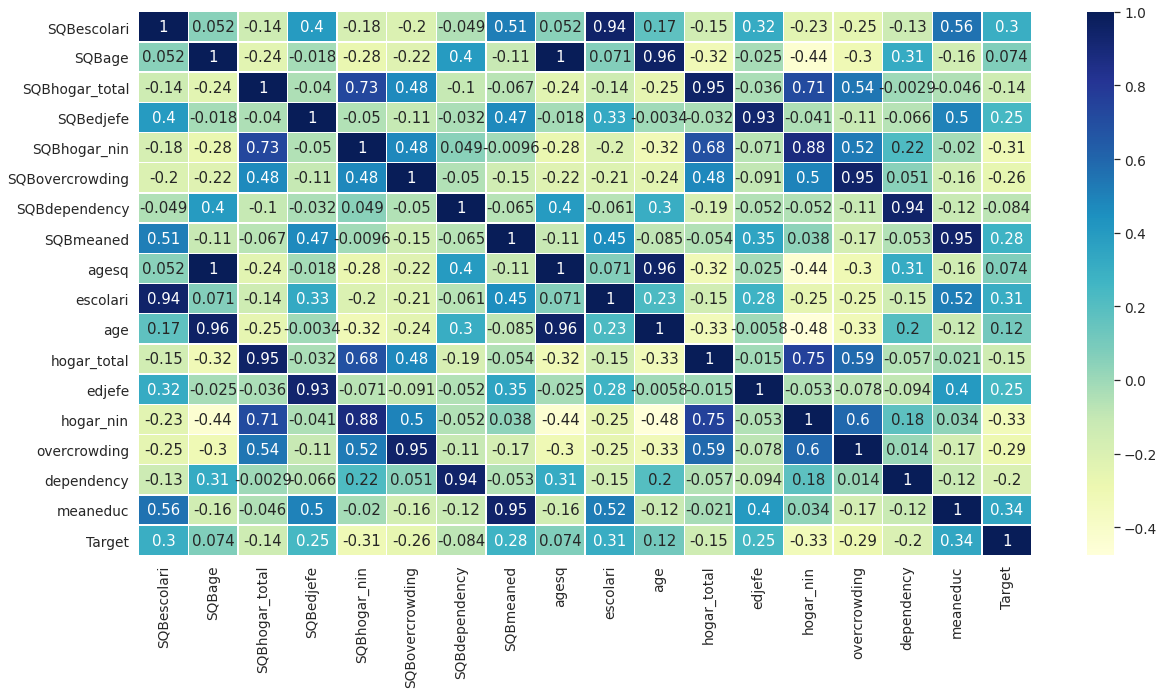

In [47]:
squared_features = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency'
                   ,'SQBmeaned', 'agesq', 'escolari', 'age', 'hogar_total', 'edjefe', 'hogar_nin', 'overcrowding', 'dependency', 'meaneduc', 'Target']

f =  plt.figure(figsize=(20, 10))
corr = train[squared_features].corr()

sns.set(font_scale = 1.25)
sns.heatmap(corr, annot = True, cmap="YlGnBu", linewidths=.5);

# Descarte das variáveis ​​quadradas

In [48]:
train.drop(columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBovercrowding', 'SQBdependency'
                    ,'SQBmeaned', 'agesq'])

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBhogar_nin,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,21eb7fcc1,0,1,0,1,0.00,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,0,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,0e5d7a658,0,1,1,1,8.00,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,0,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,2c7317ea8,0,1,1,1,8.00,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,0,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,2b58d945f,2,2,0,4,1.00,11.0,0.0,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,2b58d945f,2,2,0,4,1.00,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,0.0,0,2,2,1,2,3,1,4,5,5,5,9,0.0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,d6c086aa3,1,4,0,5,0.25,9.0,0.0,8.25,0,0,0,1,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,1,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,0.0,0,2,2,1,2,3,1,4,5,5,5,0,0.0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,d6c086aa3,1,4,0,5,0.25,9.0,0.0,8.25,1,0,0,0,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,2,1,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,0.0,0,2,2,1,2,3,1,4,5,5,5,5,0.0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,d6c086aa3,1,4,0,5,0.25,9.0,0.0,8.25,0,1,0,0,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,50,1,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,0.0,0,2,2,1,2,3,1,4,5,5,5,11,0.0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,d6c086aa3,1,4,0,5,0.25,9.0,0.0,8.25,0,0,0,0,1,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,26,1,2


In [49]:
# Variáveis domésticas

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']